<a href="https://colab.research.google.com/github/UERJ-FISICA/ML4PPGF_UERJ/blob/PPGF-2022-1/04_Classifica%C3%A7%C3%A3o_D%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 16,
     'axes.labelsize': 22,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
import sklearn

### Amostra de números escritos a mão e digitalizados

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)
X_train_raw = mnist.data[:60000]
y_train = mnist.target[:60000]
X_test_raw = mnist.data[60000:]
y_test = mnist.target[60000:]

In [3]:
print ( X_train_raw.shape )
print ( X_test_raw.shape )

(60000, 784)
(10000, 784)


In [4]:
idx = 20000
print ( y_train[ idx ] )
print ( X_train_raw[ idx ] )

3
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.  93. 131. 131.
 164. 219.  92.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   2. 116. 254. 254. 254.
 254. 248. 254.  53.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0

### Renormalização dos dados

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train_raw )
X_test  = scaler.transform( X_test_raw )
idx = 20000
print ( y_train[ idx ] )
print ( X_train[ idx ] )

3
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00441808 -0.00575482 -0.00408252 -0.00408252  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00408252 -0.00470969 -0.00879935 -0.01159056
 -0.01475898 -0.01928485 -0.0246718  -0.02907103 -0.03059266 -0.03116401
 -0.03196287 -0.03020254 -0.03131022 -0.0283834  -0.02311919 -0.01916663
 -0.0167723  -0.01099636 -0.00832486 -0.00438069  0.          0.
  0.          0.          0.          0.         -0.00408252 -0.00539535
 -0.00852241 -0.01198504 -0.01765348 -0.0277109  -0.03702009 -0.05215128
 -0.0670362  -0.08301705 -0.0993793  -0.11518413 -0.12913326 -0.13839468
 -0.13888363 -0.13184344 -0.12042952 -0.10189079 -0.0786049  -0.05699561
 -0.03965768 -0.02372839 -0.01408835 -0.00783084  0.          0.
  0.          0.         -0.0053

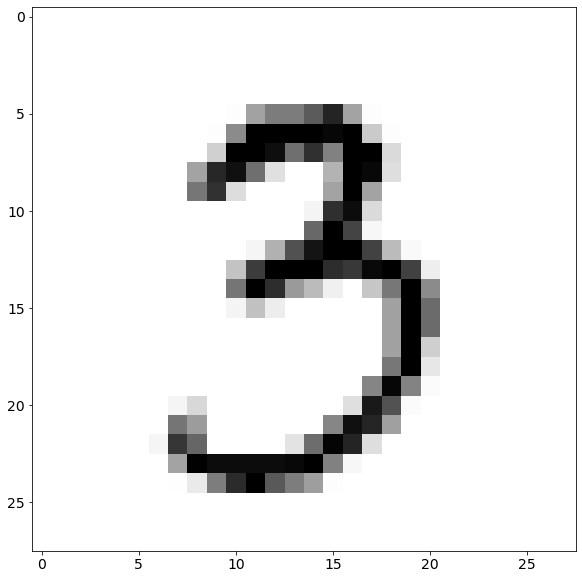

In [6]:
fig = plt.figure( figsize=(10,10) )
plt.imshow( X_train_raw[ idx ].reshape(28,28), cmap='binary' )

### Treinamento
### Classificador binário

$\textrm{Dígito} = 3 \rightarrow y = 1$

$\textrm{Dígito} \neq 3 \rightarrow y = 0$

In [7]:
msk_train_3 = ( y_train == 3 )
y_train_clf_3 = y_train.copy()
y_train_clf_3[ msk_train_3 ] = 1
y_train_clf_3[ ~msk_train_3 ] = 0
print ( y_train_clf_3[ msk_train_3 ] )
print ( y_train_clf_3[ ~msk_train_3 ] )

shuffle_index = np.random.permutation( 60000 )
X_train_shuffle, y_train_shuffle = X_train[ shuffle_index ], y_train_clf_3[ shuffle_index ]

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]


In [8]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression( max_iter=1000000 )
log_reg.fit( X_train_shuffle, y_train_shuffle )
# log_reg.fit( X_train_shuffle[:10000], y_train_shuffle[:10000] )

LogisticRegression(max_iter=1000000)

[0.01001361 0.9844541 ]
Label: 0
Pred.: 0.010013613876081935
Label: 1
Pred.: 0.9844541025017256


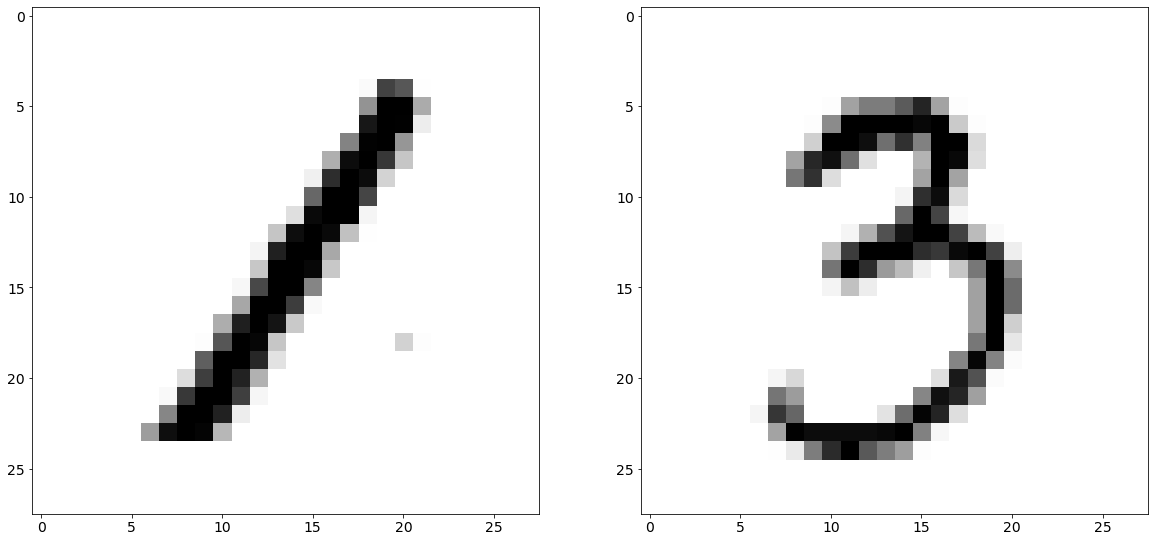

In [9]:
idx_list = [ 10000, 20000 ]

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

y_predict_proba = log_reg.predict_proba( X_train[ idx_list ] )[ :, 1 ]
print ( y_predict_proba )

for idx_, idx_data_ in enumerate( idx_list ):
    print ( "Label: {}".format( y_train_clf_3[ idx_data_ ] ) )
    print ( "Pred.: {}".format( y_predict_proba[ idx_ ] ) )
    axes[ idx_ ].imshow( X_train_raw[ idx_data_ ].reshape(28,28), cmap='binary' )

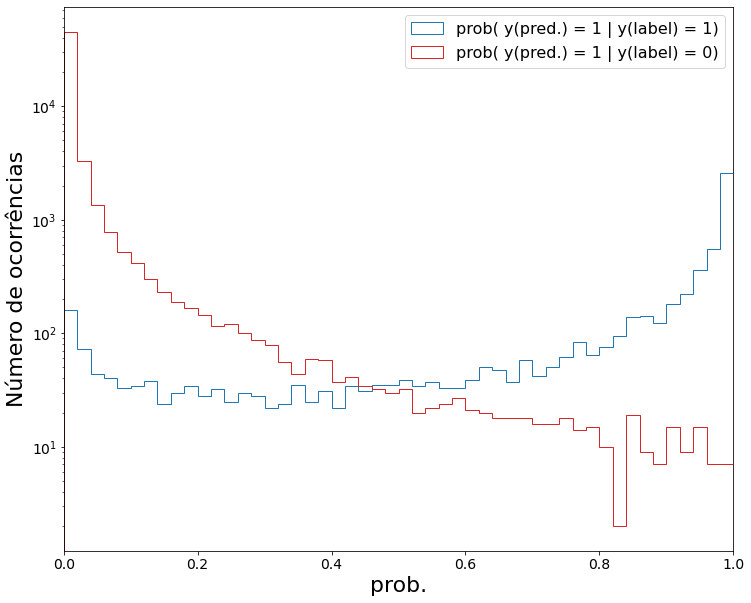

In [10]:
y_predict_proba_train = log_reg.predict_proba( X_train )[ :, 1 ]

fig = plt.figure( figsize=(12,10) )

plt.hist( y_predict_proba_train[ msk_train_3 ], histtype='step', color="tab:blue" , label="prob( y(pred.) = 1 | y(label) = 1)", bins=50, range=(0.,1.) )
plt.hist( y_predict_proba_train[ ~msk_train_3 ], histtype='step', color="tab:red" , label="prob( y(pred.) = 1 | y(label) = 0)", bins=50, range=(0.,1.) )
plt.legend( loc='best' )
plt.xlim( 0., 1. )
plt.xlabel( "prob." )
plt.ylabel( "Número de ocorrências" )
plt.yscale( 'log' )

### Teste

In [11]:
msk_test_3 = ( y_test == 3 )
y_test_clf_3 = y_test.copy()
y_test_clf_3[ msk_test_3 ] = 1
y_test_clf_3[ ~msk_test_3 ] = 0
print ( y_test_clf_3[ msk_test_3 ] )
print ( y_test_clf_3[ ~msk_test_3 ] )

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]


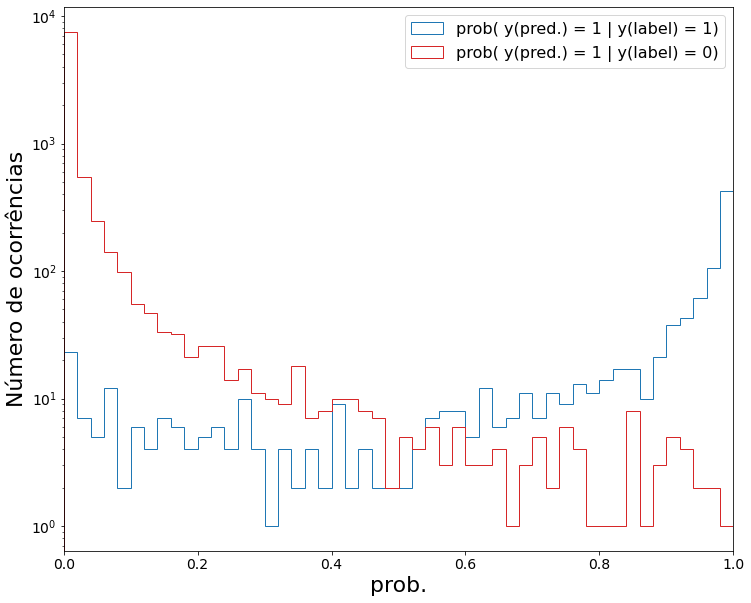

In [12]:
y_predict_proba_test = log_reg.predict_proba( X_test )[ :, 1 ]

fig = plt.figure( figsize=(12,10) )

plt.hist( y_predict_proba_test[ msk_test_3 ], histtype='step', color="tab:blue" , label="prob( y(pred.) = 1 | y(label) = 1)", bins=50, range=(0.,1.) )
plt.hist( y_predict_proba_test[ ~msk_test_3 ], histtype='step', color="tab:red" , label="prob( y(pred.) = 1 | y(label) = 0)", bins=50, range=(0.,1.) )
plt.legend( loc='best' )
plt.xlim( 0., 1. )
plt.xlabel( "prob." )
plt.ylabel( "Número de ocorrências" )
plt.yscale( 'log' )

In [13]:
prob_cut = 0.50

y_predict_test = np.full_like( y_predict_proba_test, -1 )
msk_prob_cut = ( y_predict_proba_test >= prob_cut )
y_predict_test[ msk_prob_cut ]  = 1
y_predict_test[ ~msk_prob_cut ] = 0

accuracy = np.sum( y_predict_test == y_test_clf_3 ) / y_test_clf_3.size
print ( "Accuracy = {}".format( accuracy ) )

Accuracy = 0.9779


### Classificação multi-classe

$ p^{(k)}( \mathbf{x}_n; \mathbf{W} ) = \frac{ \exp\left({ {\mathbf{w}^{(k)}}^{T} \cdot \mathbf{x}_n }\right) }{ \sum_{i=1}^{m} \exp\left({ {\mathbf{w}^{(i)}}^{T} \cdot \mathbf{x}_n }\right) } , \quad k = 1,\textrm{...},m \;(\textrm{m classes})$

$ J( \mathbf{W} ) = -\frac{1}{N} \sum_{n=1}^{N} \sum_{k=1}^{m} \left[ z_n^{(k)} \log p^{(k)}( \mathbf{x}_n; \mathbf{W} ) \right] , \quad z_n^{(k)} = \begin{cases} 1 , \quad y_n = k \\ 0 , \quad y_n \neq k \end{cases}$

$ \hat{y}_n = \left\{ k \;\; | \;\; p^{(k)}( \mathbf{x}_n; \mathbf{W} ) \geq p^{(i)}( \mathbf{x}_n; \mathbf{W} ), \forall i=1,\textrm{...},m \right\}$


In [14]:
shuffle_index = np.random.permutation( 60000 )
X_train_shuffle_multi, y_train_shuffle_multi = X_train[ shuffle_index ], y_train[ shuffle_index ]

softmax_reg = linear_model.LogisticRegression( multi_class='multinomial', max_iter=1000000 )
softmax_reg.fit( X_train_shuffle_multi, y_train_shuffle_multi )
# softmax_reg.fit( X_train_shuffle_multi[:20000], y_train_shuffle_multi[:20000] )

LogisticRegression(max_iter=1000000, multi_class='multinomial')

Label: 2
Prob.: [2.50876643e-13 1.98356711e-17 9.97248933e-01 2.74530580e-03
 4.55878104e-16 1.13258849e-06 7.89204029e-16 3.60539022e-18
 4.62890009e-06 4.08388059e-11]
Pred.: 2
Label: 6
Prob.: [7.53155491e-08 7.68669823e-14 1.57540125e-01 9.21704614e-06
 1.19367092e-05 5.29596761e-04 8.41894839e-01 8.62416624e-14
 1.40617274e-05 1.48588948e-07]
Pred.: 6


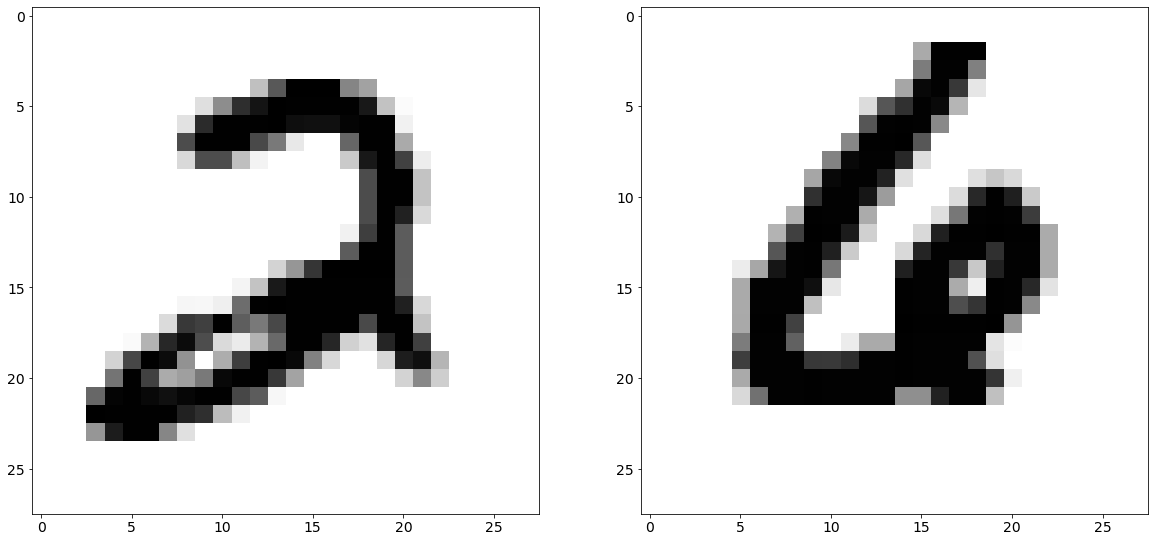

In [15]:
# idx_list = [ 10000, 20000 ]
idx_list = [ 15000, 40000 ]

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

y_predict_proba = softmax_reg.predict_proba( X_train[ idx_list ] )
y_predict = softmax_reg.predict( X_train[ idx_list ] )

for idx_, idx_data_ in enumerate( idx_list ):
    print ( "Label: {}".format( y_train[ idx_data_ ] ) )
    print ( "Prob.: {}".format( y_predict_proba[ idx_ ] ) )
    print ( "Pred.: {}".format( y_predict[ idx_ ] ) )
    axes[ idx_ ].imshow( X_train_raw[ idx_data_ ].reshape(28,28), cmap='binary' )

In [16]:
y_predict_test = softmax_reg.predict( X_test )

accuracy = np.sum( y_predict_test == y_test ) / y_test.size
print ( "Accuracy = {}".format( accuracy ) )

Accuracy = 0.9211


789
0: 33
1: 27
2: 117
3: 89
4: 69
5: 118
6: 50
7: 85
8: 116
9: 85


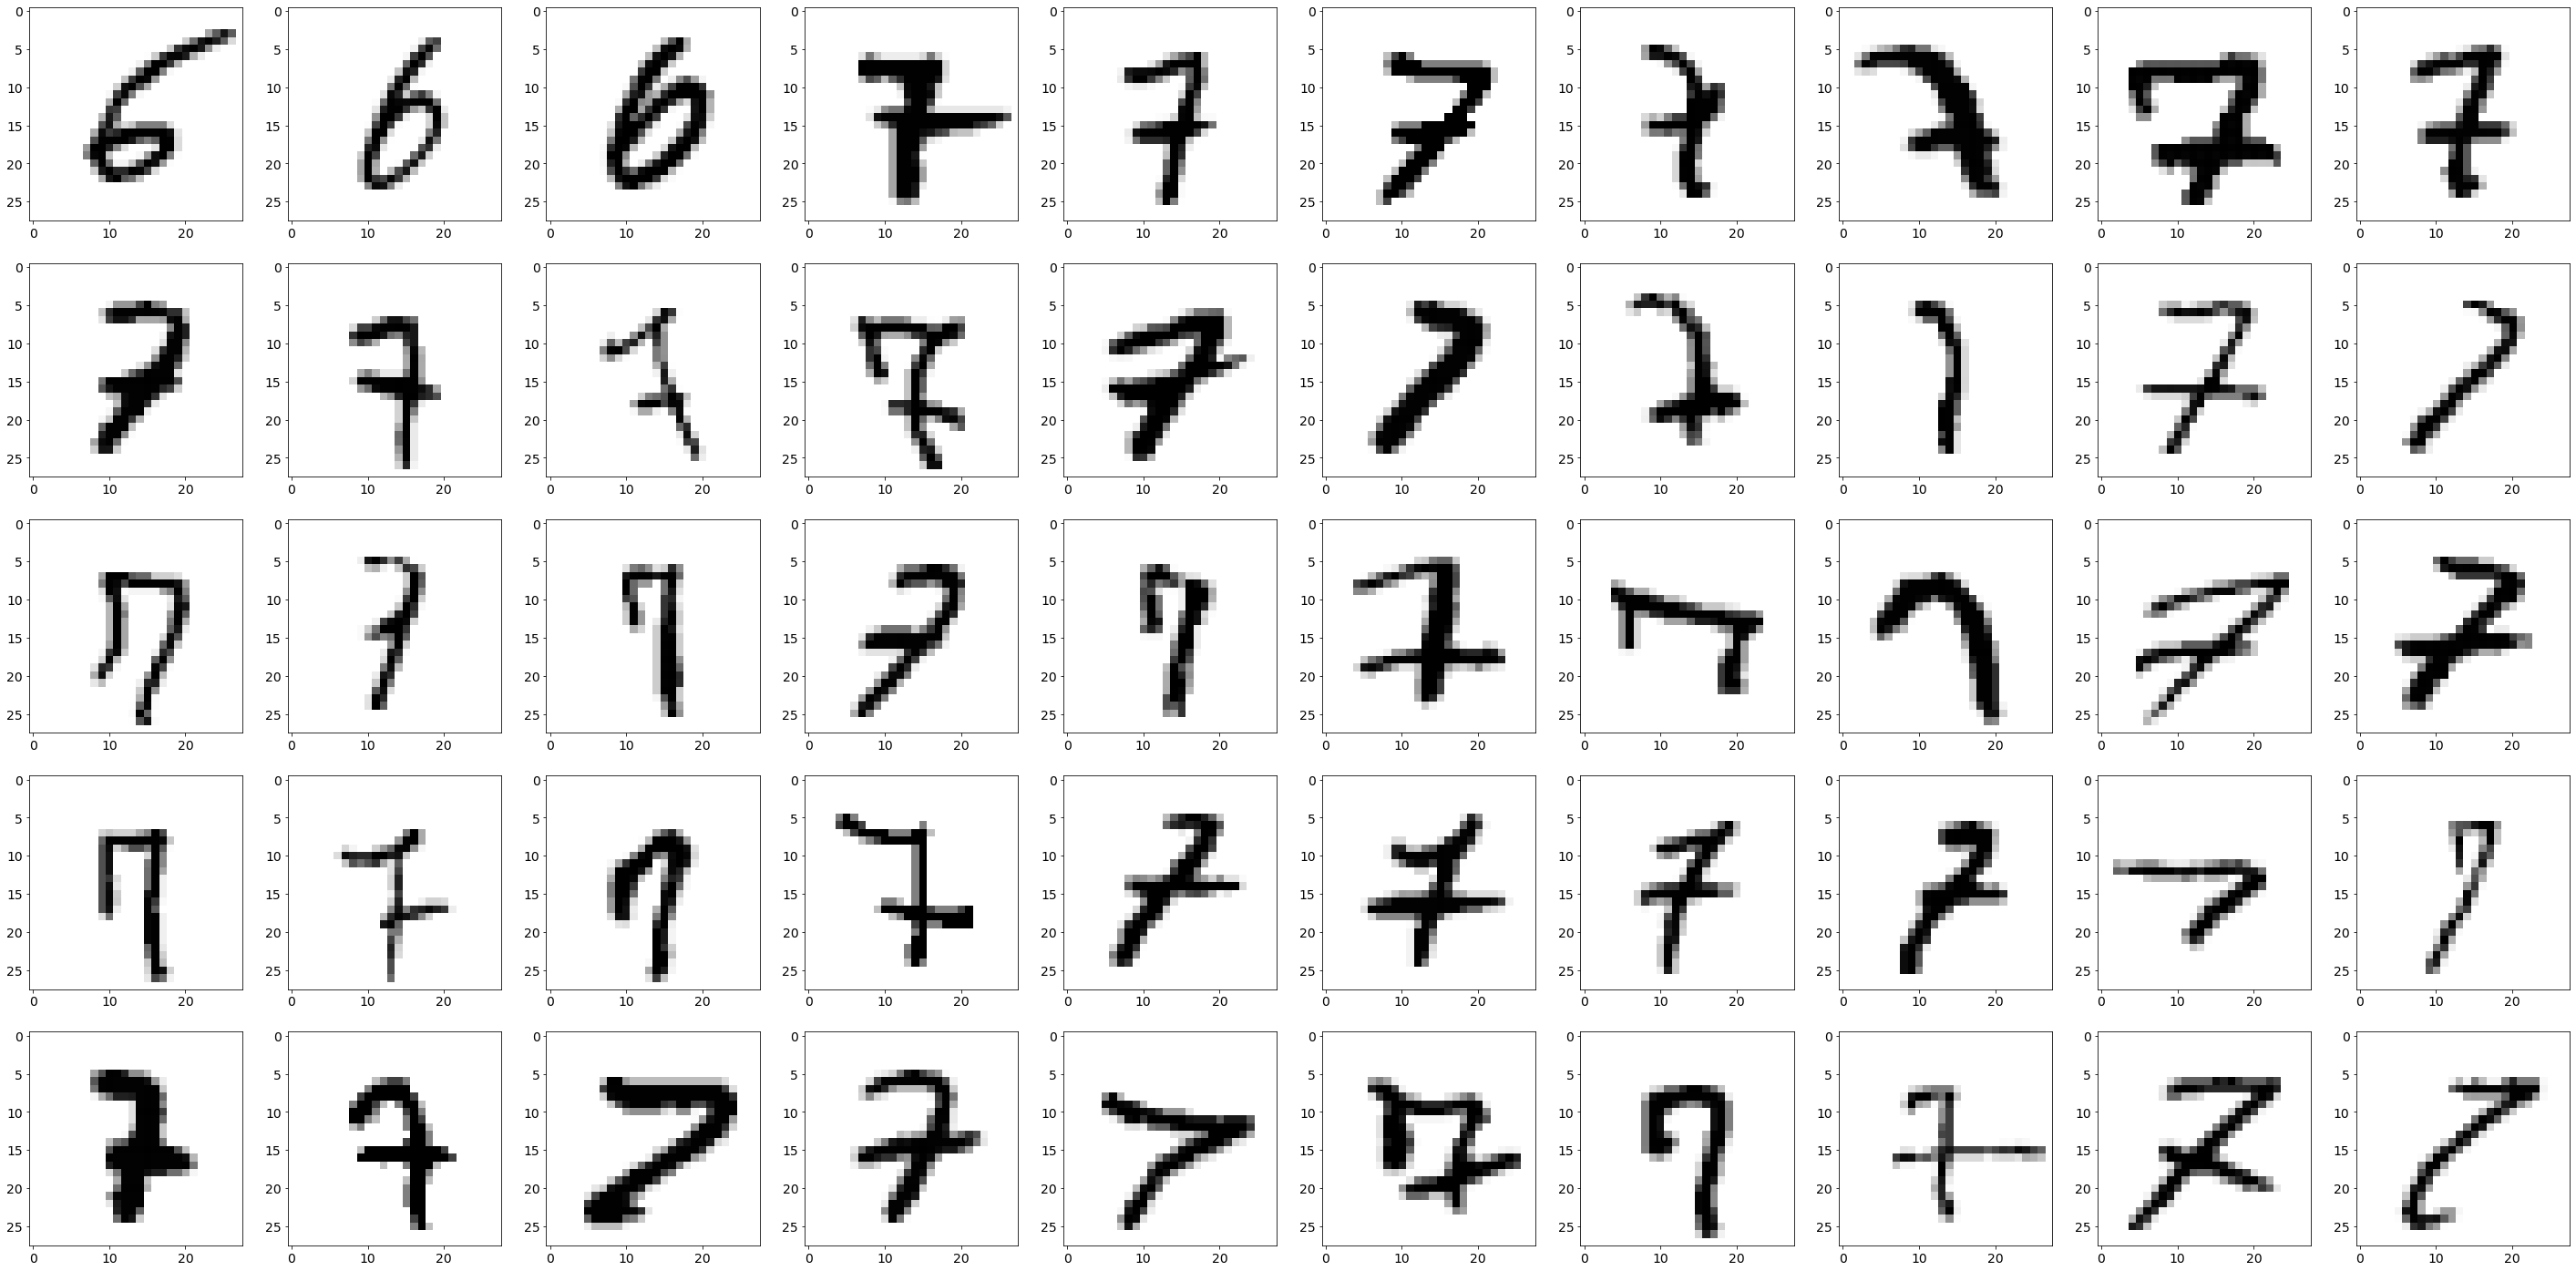

In [17]:
def plot_digits( X, n, start = 0 ):
    n_per_row_ = 10
    n_rows_ = int( ( n / n_per_row_  ) if ( n % n_per_row_ ) == 0 else ( ( n // n_per_row_ ) + 1 ) )
    size_ = 5
    fig_, axes_ = plt.subplots( n_rows_, n_per_row_, figsize=( n_per_row_ * size_ , n_rows_ * size_ ) )
    idx_row_, idx_col_ = 0, 0
    for idx__ in range( n ):
        ax_ = axes_[ idx_row_, idx_col_ ]
        ax_.imshow( X[ start+idx__ ].reshape(28,28), cmap='binary' )
        idx_col_ += 1
        if idx_col_ % n_per_row_ == 0:
            idx_row_ += 1
            idx_col_  = 0

msk_error_ = y_predict_test != y_test
print ( np.sum( msk_error_ ) )
for label_ in range( 10 ):
    msk__ = msk_error_ & ( y_test == label_ )
    print ( "{}: {}".format( label_, np.sum( msk__ ) ) )

plot_digits( X_test_raw[ msk_error_ ], 50, 500 )

In [18]:
# np.info( linear_model.LogisticRegression )///